*Exercise: Temporal Patterns and Seasonality: Demonstrate how the number of charging events varies during
 the day, the week, and between seasons. What patterns can you observe, and how do you explain
 them?*

**Observations and Analysis**
The distribution of charging events shows very strong diurnal, strong weekday, and decent seasonal patterns. The charts generated from the code below show those patterns cumulated over the whole data set.

1.**Diurnal:**
    From 10am until 2pm, we can observe a steep, initially even exponential increase in active charging sessions with the number arriving at its peak in the early afternoon. The hourly session density then drops to about a third of peak utilization at around 6pm, with a subtle decrease until midnight following thereafter. In the night and early morning, density further drops to its minimum at 9am.
    The emerging pattern can be expected to stem from the kind of activity that people go after when using the two sites. Both sites are, to our best knowledge, not in the vicinity of leisure facilities, but rather situated on university and a company grounds. We can thus deduct that people will most likely use the sites to park their car when at work or attending lectures. these are both activities that happen most during normal working hours. The utilization during the night might stem from cars being left there for various reasons.
    
2.**Weekly:**
    On the usual working days from Monday to Friday, the session density is remarkably high and is around four times the weekend utilization. Among the working days, Tuesday, Wednesday, and Thursday have the highest utilization followed closely by Monday and Friday. On Sundays, the site is used the least.
    As for the diurnal pattern, it is likely that the weekly usage pattern originates in the fact that the sites are used by employees when working on normal work days or by university students or employees during normal university opening hours, which should mostly be during the work week. On mondays and fridays, utilization could be lower than in the middle of the week because of homeoffice or part-time workers for the company site and a concentration of lectures in the middle of the week for the university site. Some people might leave their car for the weekend due to various personal reasons, explaining the usage on weekends.
    
3.**Seasonal:**
    A first look at the seasonal patterns unveils that during the warmer seasons, the site is used the least with the minimum in Summer followed closely by Spring. In the Winter, more sessions are happening and in Fall, utilization rate is highest.
    The relatively weak seasonal pattern could be explained with LA's relatively pleasant weather all year round. One could expect people to choose the car over other means of transportation in case of bad weather, but this seems to only hold true for winter, where felt temperatures are lowest and precipitation means are highest. In fall however, conditions are still very comfortable and still utilization is highest, which does not seem intuitive, but might be explained with fewer people going on vacation in this time of the year.

    


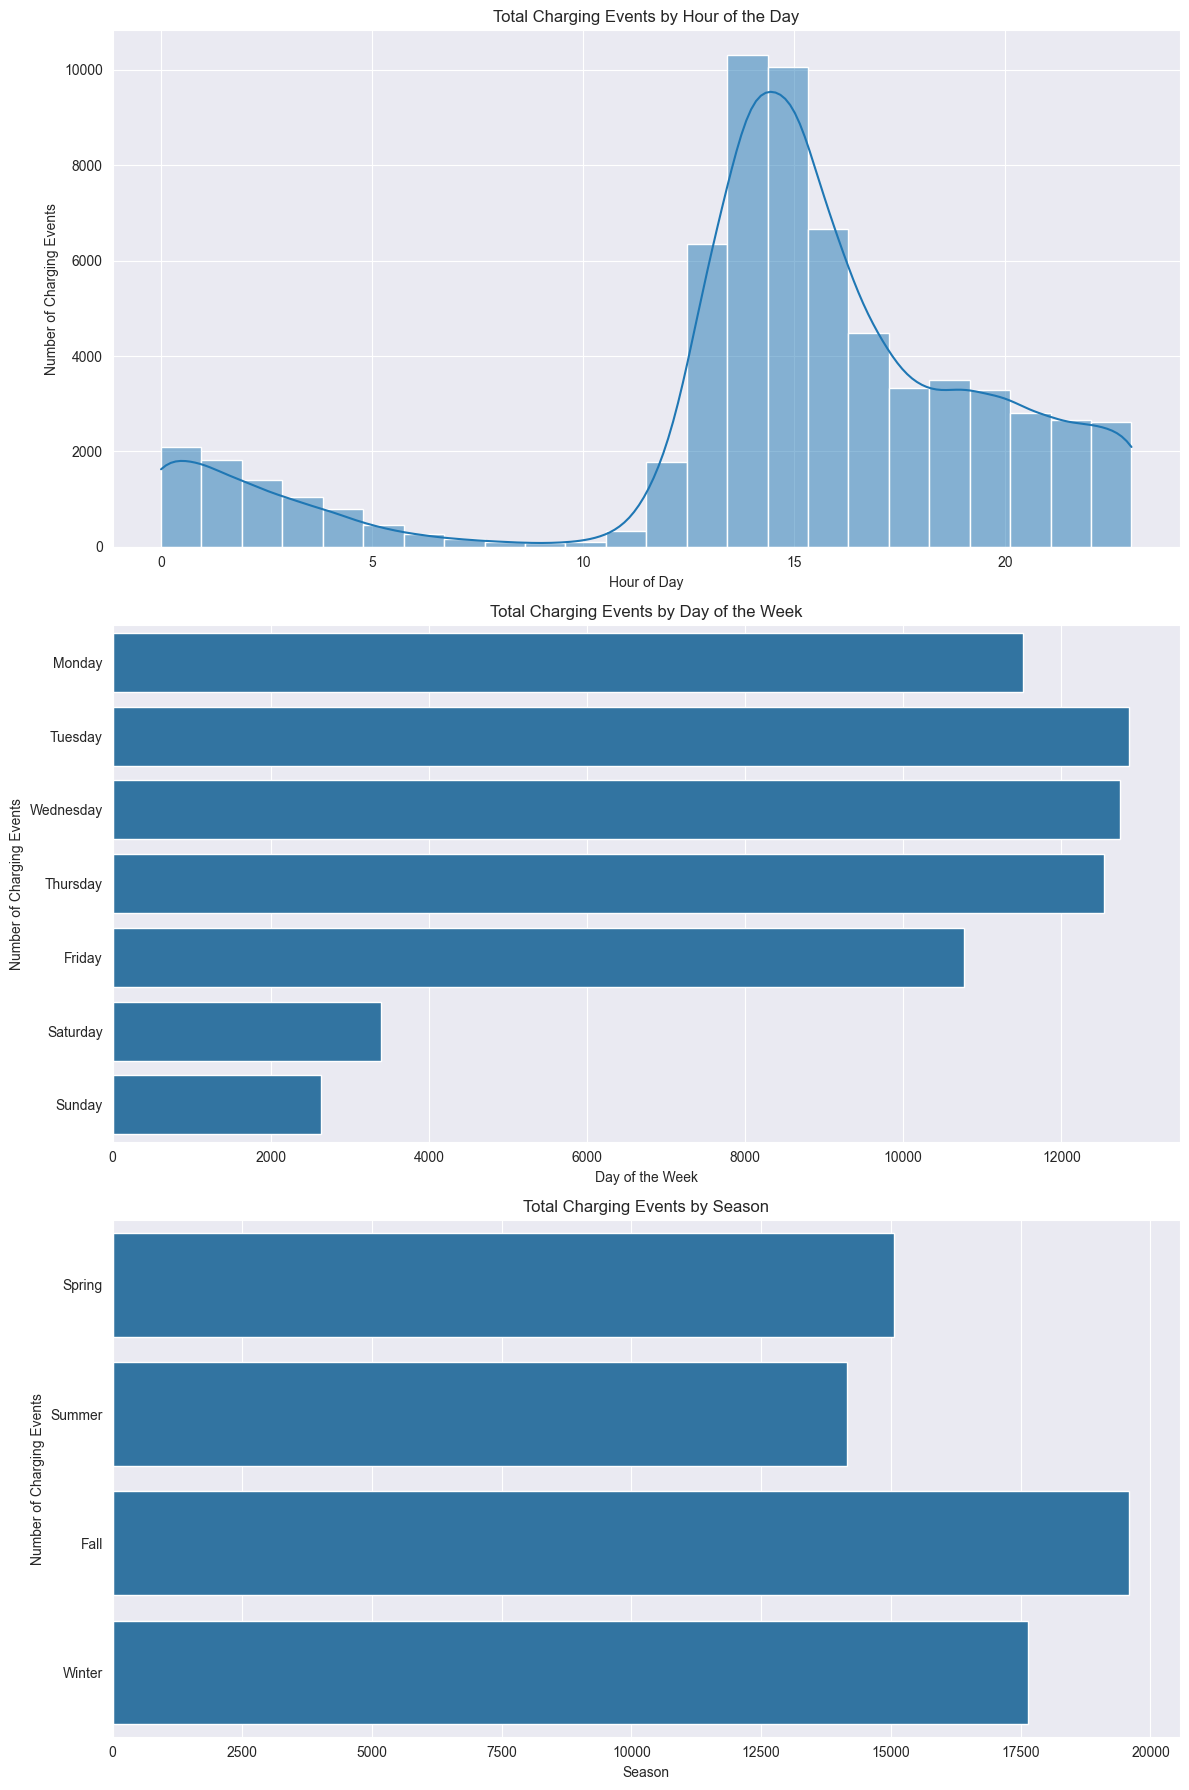

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# diurnal, weekly, and seasonal utilization:

# Load the data
data = pd.read_csv("../data/raw/charging_sessions.csv", parse_dates=["connectionTime", "disconnectTime", "doneChargingTime"])

# Extract time-related features for analysis
data['hour'] = data['connectionTime'].dt.hour
data['day_of_week'] = data['connectionTime'].dt.day_name()
data['month'] = data['connectionTime'].dt.month
data['season'] = data['connectionTime'].dt.month % 12 // 3 + 1  # Spring=1, Summer=2, Fall=3, Winter=4

# three plots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Hourly
sns.histplot(data['hour'], bins=24, kde=True, ax=axes[0])
axes[0].set_title("Total Charging Events by Hour of the Day")
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("Number of Charging Events")

# Weekly
sns.countplot(data['day_of_week'], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ax=axes[1])
axes[1].set_title("Total Charging Events by Day of the Week")
axes[1].set_xlabel("Day of the Week")
axes[1].set_ylabel("Number of Charging Events")

# Seasonal
season_labels = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
data['season'] = data['season'].map(season_labels)
sns.countplot(data['season'], order=['Spring', 'Summer', 'Fall', 'Winter'], ax=axes[2])
axes[2].set_title("Total Charging Events by Season")
axes[2].set_xlabel("Season")
axes[2].set_ylabel("Number of Charging Events")

# Adjust layout
plt.tight_layout()
plt.show()



C:\Users\malte\PycharmProjects\AAEnergizer\2a


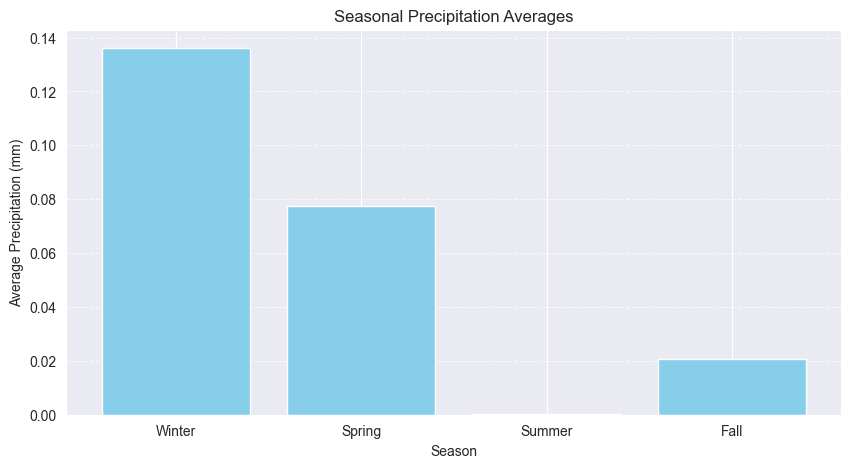

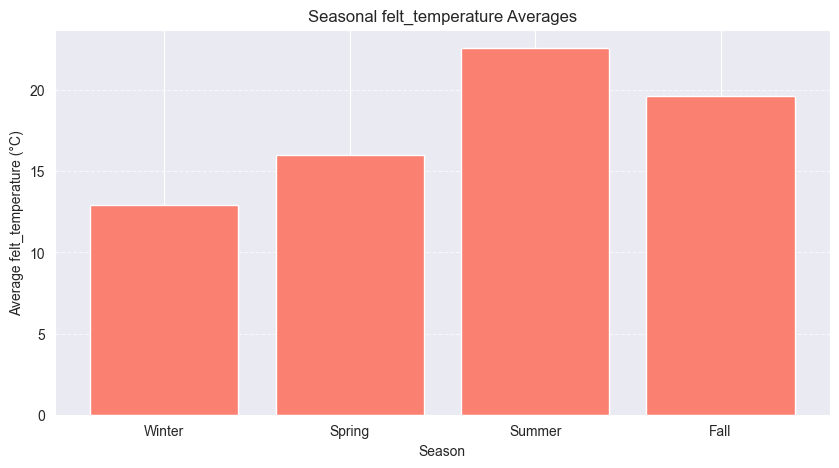

In [14]:
# Seasonal weather analysis:

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("../data/raw/weather_burbank_airport.csv")

# Convert timestamp to datetime and extract month
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['month'] = data['timestamp'].dt.month

# Define seasons
season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
data['season'] = data['month'].map(season_mapping)

# Group by season and calculate mean precipitation and felt_temperature
seasonal_averages = data.groupby('season').agg({
    'precipitation': 'mean',
    'felt_temperature': 'mean'
}).reindex(['Winter', 'Spring', 'Summer', 'Fall'])  # Ensure proper seasonal order


# Plot seasonal precipitation averages
plt.figure(figsize=(10, 5))
plt.bar(seasonal_averages.index, seasonal_averages['precipitation'], color='skyblue')
plt.title('Seasonal Precipitation Averages')
plt.xlabel('Season')
plt.ylabel('Average Precipitation (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot seasonal felt_temperature averages
plt.figure(figsize=(10, 5))
plt.bar(seasonal_averages.index, seasonal_averages['felt_temperature'], color='salmon')
plt.title('Seasonal felt_temperature Averages')
plt.xlabel('Season')
plt.ylabel('Average felt_temperature (°C)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
